<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/IBMCertifiedAssociateDeveloperQiskit/1.3-Single_Qubit_Gates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit[visualization]
!pip install imgaug==0.2.5
!pip install pylatexenc

References:


*   https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html




In [2]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf

[default]
circuit_drawer = mpl


## The P-gate (or phase-shift gate)

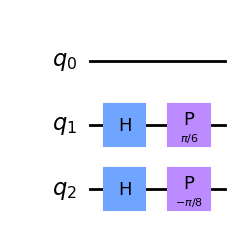

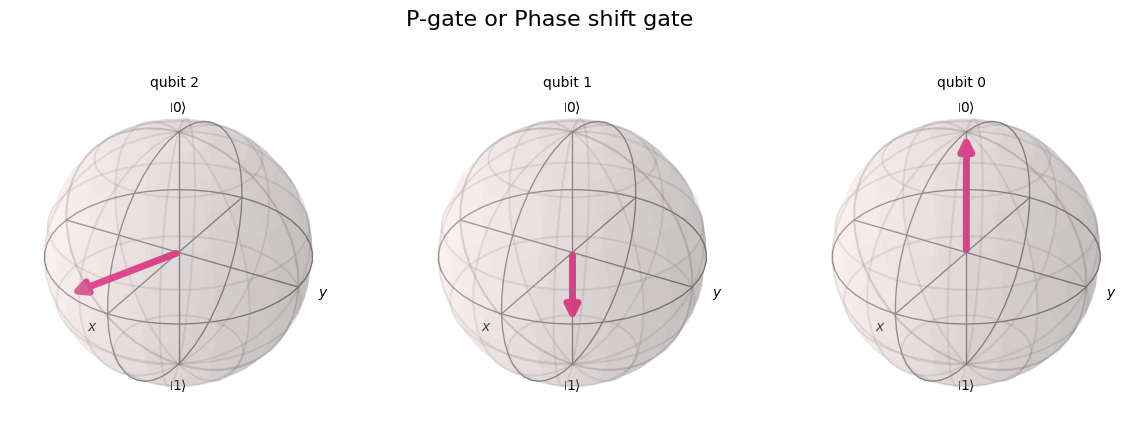

In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(3)
qc.h(1) #moves the qubits to hadamard basis, to visualize the phase rotation next
qc.h(2)
qc.p(np.pi/6, 1)
qc.p(-np.pi/8, 2)
psi = Statevector.from_instruction(qc)

display(qc.draw())

plot_bloch_multivector(psi, title="P-gate or Phase shift gate", reverse_bits=True)

##The identity gate

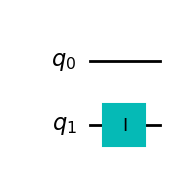

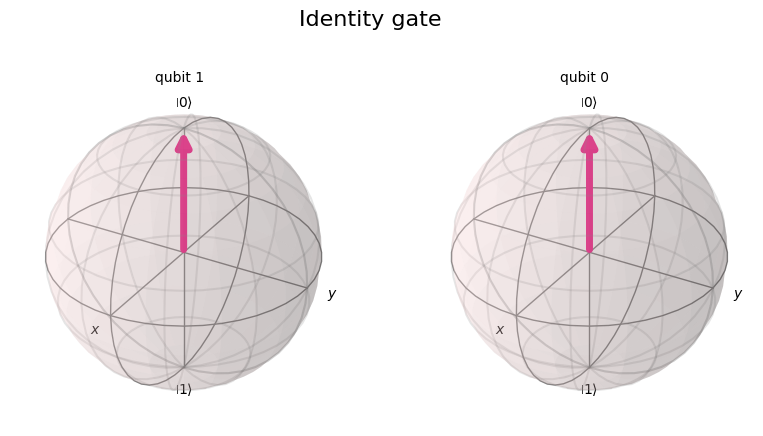

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(2)
qc.id(1)

psi = Statevector.from_instruction(qc)

display(qc.draw())
plot_bloch_multivector(psi, title="Identity gate", reverse_bits=True)

## Pauli Gates (X, Y, Z)

### Pauli X

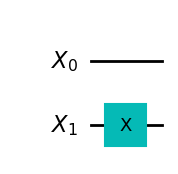

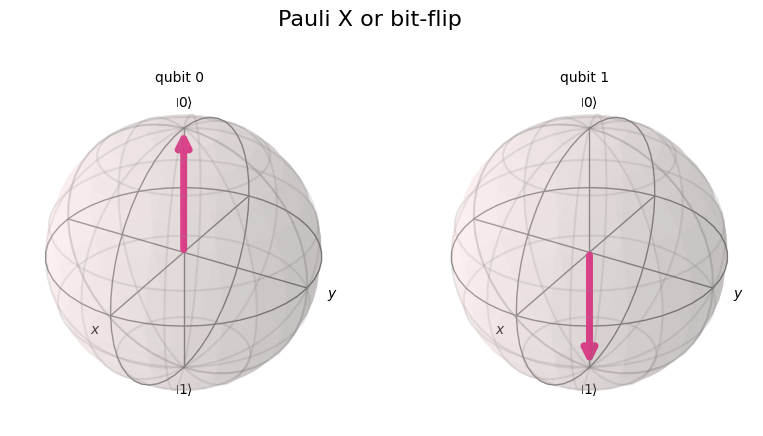

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

qr = QuantumRegister(2, "X")
qc = QuantumCircuit(qr)
qc.x(1)
psi = Statevector.from_instruction(qc)
display(qc.draw())
plot_bloch_multivector(psi, title="Pauli X or bit-flip")

### Pauli Z - phase-flip

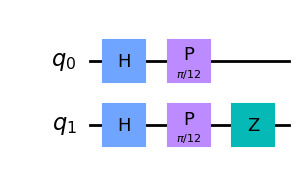

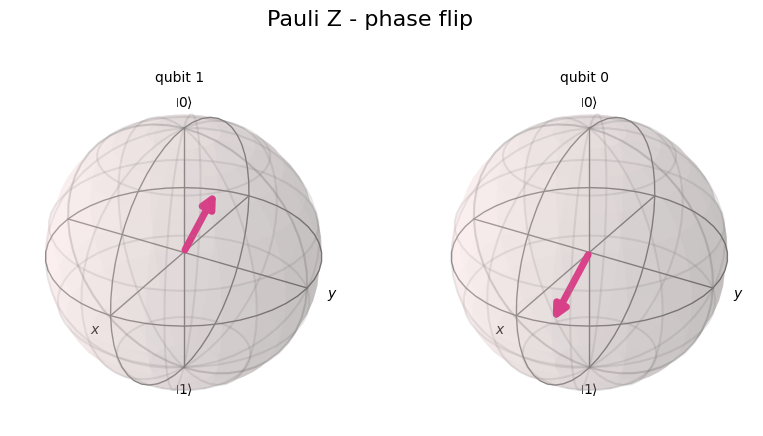

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(2)
qc.h([0,1])
qc.p(np.pi/12, [0,1])
qc.z(1)
psi = Statevector.from_instruction(qc)

display(qc.draw())
plot_bloch_multivector(psi, title="Pauli Z - phase flip", reverse_bits=True)

### Pauli Y - bit and phase flip (Y = iXZ)

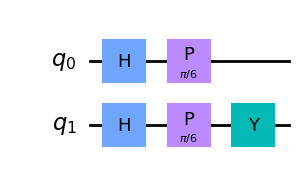

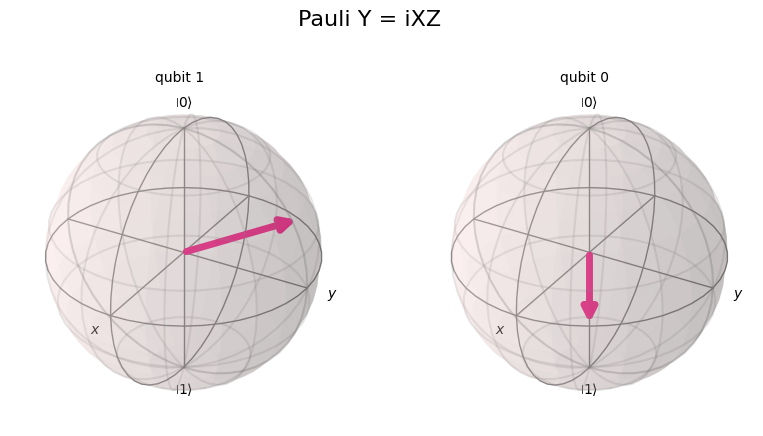

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(2)
qc.h([0,1])
qc.p(np.pi/6, [0,1])

qc.y(1)
psi = Statevector.from_instruction(qc)

display(qc.draw())
plot_bloch_multivector(psi, title="Pauli Y = iXZ", reverse_bits=True)

## The Cliford gates

### Hadamard

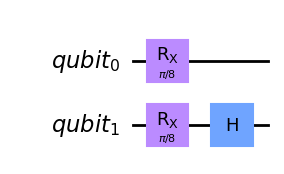

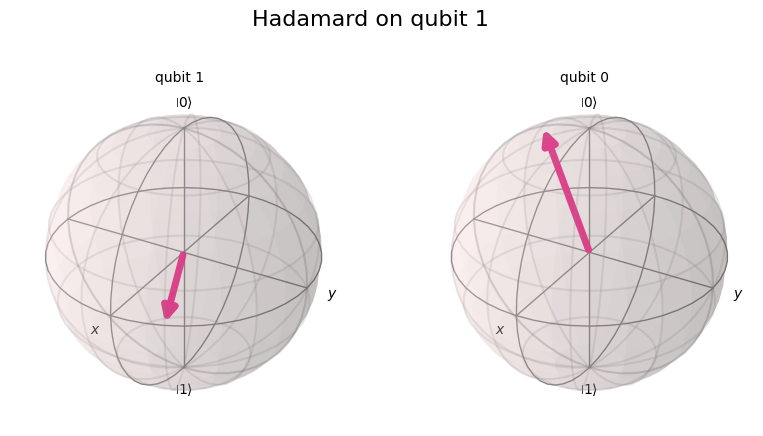

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

qr = QuantumRegister(2, 'qubit')

qc = QuantumCircuit(qr)
qc.rx(np.pi/8, qr)
qc.h(qr[1])

sv = Statevector.from_instruction(qc)

display(qc.draw())
plot_bloch_multivector(qc, title = "Hadamard on qubit 1", reverse_bits=True)

### S gate (or $\sqrt{Z}$ gate) - rotation of 90 degrees around Z-axis
Note, this gate is called  $\sqrt{Z}$ gate because applying it twice is equivalent to apply the Pauli-Z gate (rotation of $\pi$ around the Z-axis)

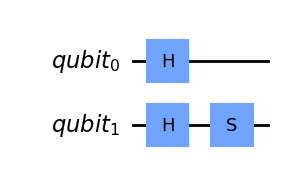

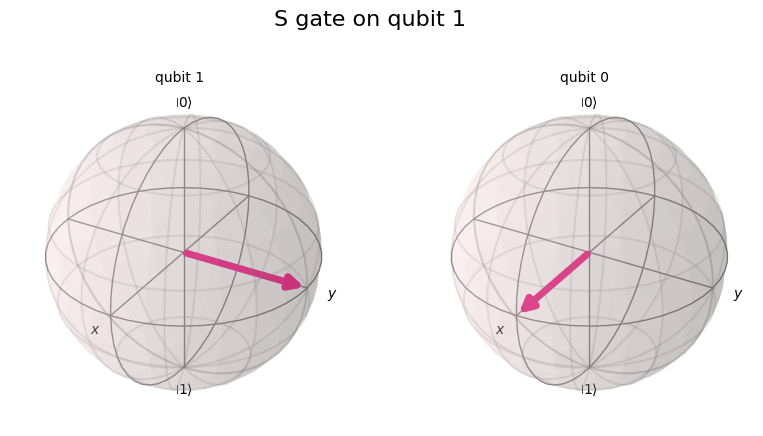

In [15]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

qr = QuantumRegister(2, name="qubit")

qc = QuantumCircuit(qr)

qc.h(qr)
qc.s(qr[1])
sv = Statevector.from_instruction(qc)

display(qc.draw())

plot_bloch_multivector(sv, title = "S gate on qubit 1", reverse_bits=True)

### $S \dagger$ (or conjugate of $ \sqrt Z $ gate)
This rotates the qubit -$pi/2$ around the Z-axis

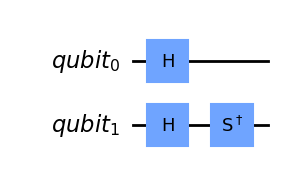

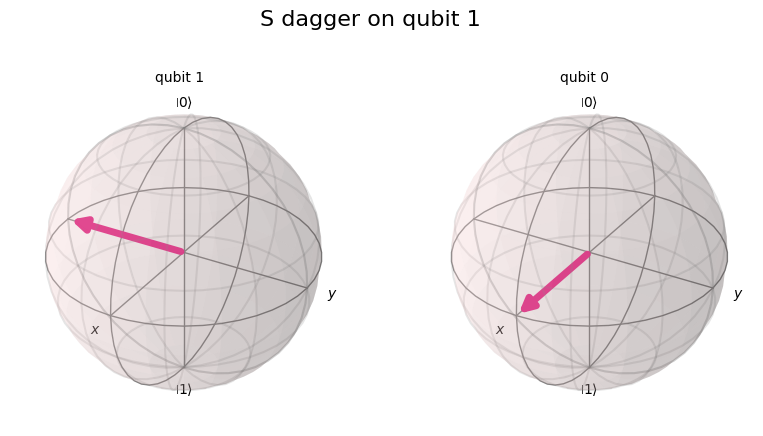

In [12]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

qr=QuantumRegister(2, "qubit")
qc=QuantumCircuit(qr)
qc.h(qr)
qc.sdg(qr[1])
sv = Statevector.from_instruction(qc)

display(qc.draw())
plot_bloch_multivector(sv, title="S dagger on qubit 1", reverse_bits=True)

## C3 gates

### T (or $\sqrt{S}$) gate
This gate rotates the state by $\pi/4$, reason why is also called $\sqrt{S}$

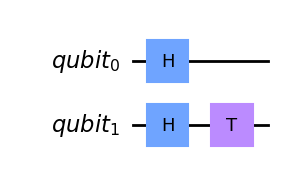

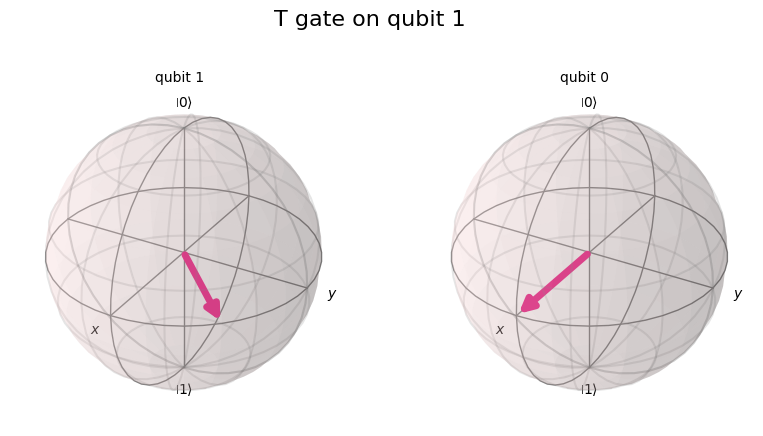

In [18]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

qr = QuantumRegister(2, name="qubit")

qc = QuantumCircuit()
qc.add_register(qr)

qc.h(qr)
qc.t(qr[1])
sv = Statevector.from_instruction(qc)

display(qc.draw())
plot_bloch_multivector(sv, title="T gate on qubit 1", reverse_bits=True)

### $T\dagger$ (or conjugate $\sqrt{S}$) gate
This gate implements state rotation of $-\pi/4$ on the Z-axis

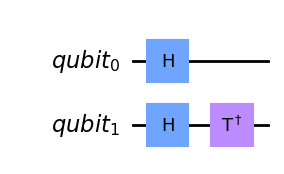

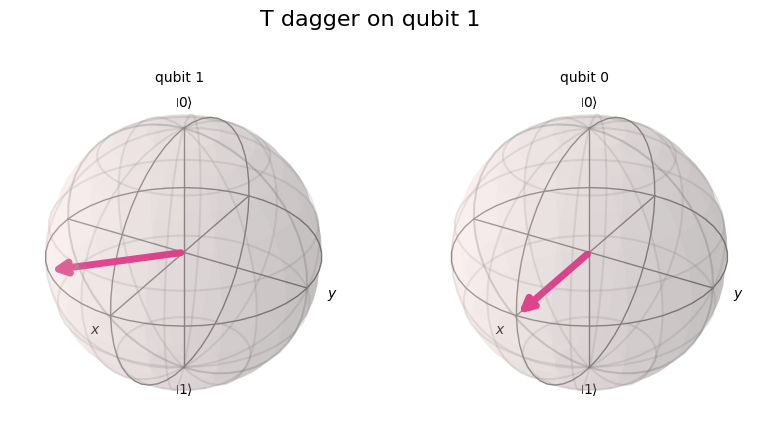

In [20]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

qr = QuantumRegister(2, name="qubit")

qc = QuantumCircuit(qr)

qc.h(qr)
qc.tdg(qr[1])
sv = Statevector.from_instruction(qc)

display(qc.draw())
plot_bloch_multivector(sv, title="T dagger on qubit 1", reverse_bits=True)

## Standard Rotations: $R_x, R_y, R_z$
These are rotations around the Pauli X, Y, Z

### $R_x$ (rotation around the X-axis)

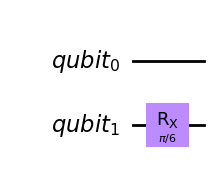

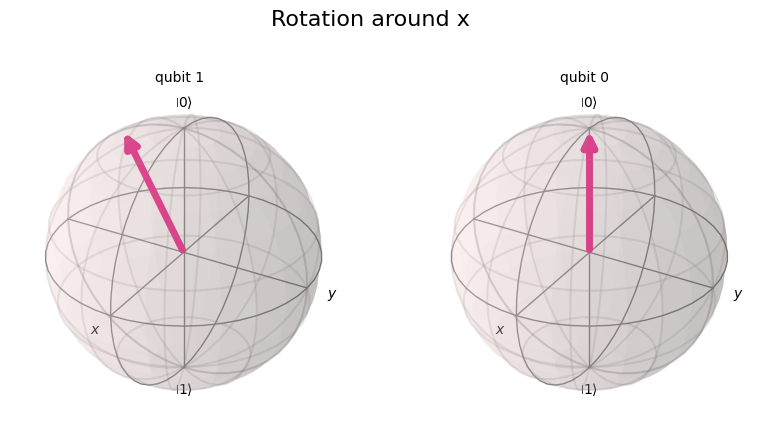

In [24]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

qr = QuantumRegister(2, name="qubit")
qc = QuantumCircuit(qr)

qc.rx(np.pi/6, qr[1])
sv = Statevector.from_instruction(qc)

display(qc.draw())
plot_bloch_multivector(sv, title="Rotation around x", reverse_bits=True)